In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv("EUR_TND Historical Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/12/2024,3.3869,3.3946,3.4104,3.3818,NaN,-0.15%
1,01/11/2024,3.3919,3.3937,3.4083,3.3818,NaN,0.01%
2,01/10/2024,3.3914,3.3854,3.4012,3.3716,NaN,0.25%
3,01/09/2024,3.3830,3.3895,3.4017,3.3610,NaN,-0.12%
4,01/08/2024,3.3870,3.3872,3.4020,3.3627,NaN,-0.03%


In [3]:
df.describe()

,Price,Open,High,Low
count,1045.000000,1045.000000,1045.000000,1045.000000
mean,3.268641,3.272884,3.300169,3.248257
std,0.070174,0.070822,0.068905,0.068167
min,3.080400,3.078400,3.109000,3.062400
25%,3.222000,3.227800,3.257600,3.206200
50%,3.268700,3.272300,3.298200,3.248700
75%,3.320800,3.327400,3.358200,3.297100
max,3.438900,3.450700,3.457400,3.391100


In [4]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

**Date:** The date of the exchange rate.<br>
**Price:** The closing exchange rate (EUR/TND).<br>
**Open:** The opening exchange rate.<br>
**High:** The highest exchange rate for the day.<br>
**Low:** The lowest exchange rate for the day.<br>
**Vol.:** Refers to the trading volume, which represents the total number of currency units exchanged during the specified time frame.<br>
**Change %:** The percentage change in the exchange rate compared to the previous day.<br>

In [5]:
df.shape

(1045, 7)

In [6]:
#Remove non-numeric characters and convert to float
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/12/2024,3.3869,3.3946,3.4104,3.3818,NaN,-0.15
1,01/11/2024,3.3919,3.3937,3.4083,3.3818,NaN,0.01
2,01/10/2024,3.3914,3.3854,3.4012,3.3716,NaN,0.25
3,01/09/2024,3.3830,3.3895,3.4017,3.3610,NaN,-0.12
4,01/08/2024,3.3870,3.3872,3.4020,3.3627,NaN,-0.03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1045 non-null   object 
 1   Price     1045 non-null   float64
 2   Open      1045 non-null   float64
 3   High      1045 non-null   float64
 4   Low       1045 non-null   float64
 5   Vol.      793 non-null    object 
 6   Change %  1045 non-null   float64
dtypes: float64(5), object(2)
memory usage: 57.3+ KB


**The "Vol." column has 793 non-null entries out of 1045, meaning there are 1045 - 793 = 252 missing values.**<br>
**let's visualize our missing data and determine wheteher we keep it or we drop it<br>Vol. Refers to the trading volume, which represents the total number of currency units exchanged during the specified time frame, we have alternatives so we could drop it for easier acess to our data** 

In [8]:
!pip install missingno

<Axes: >

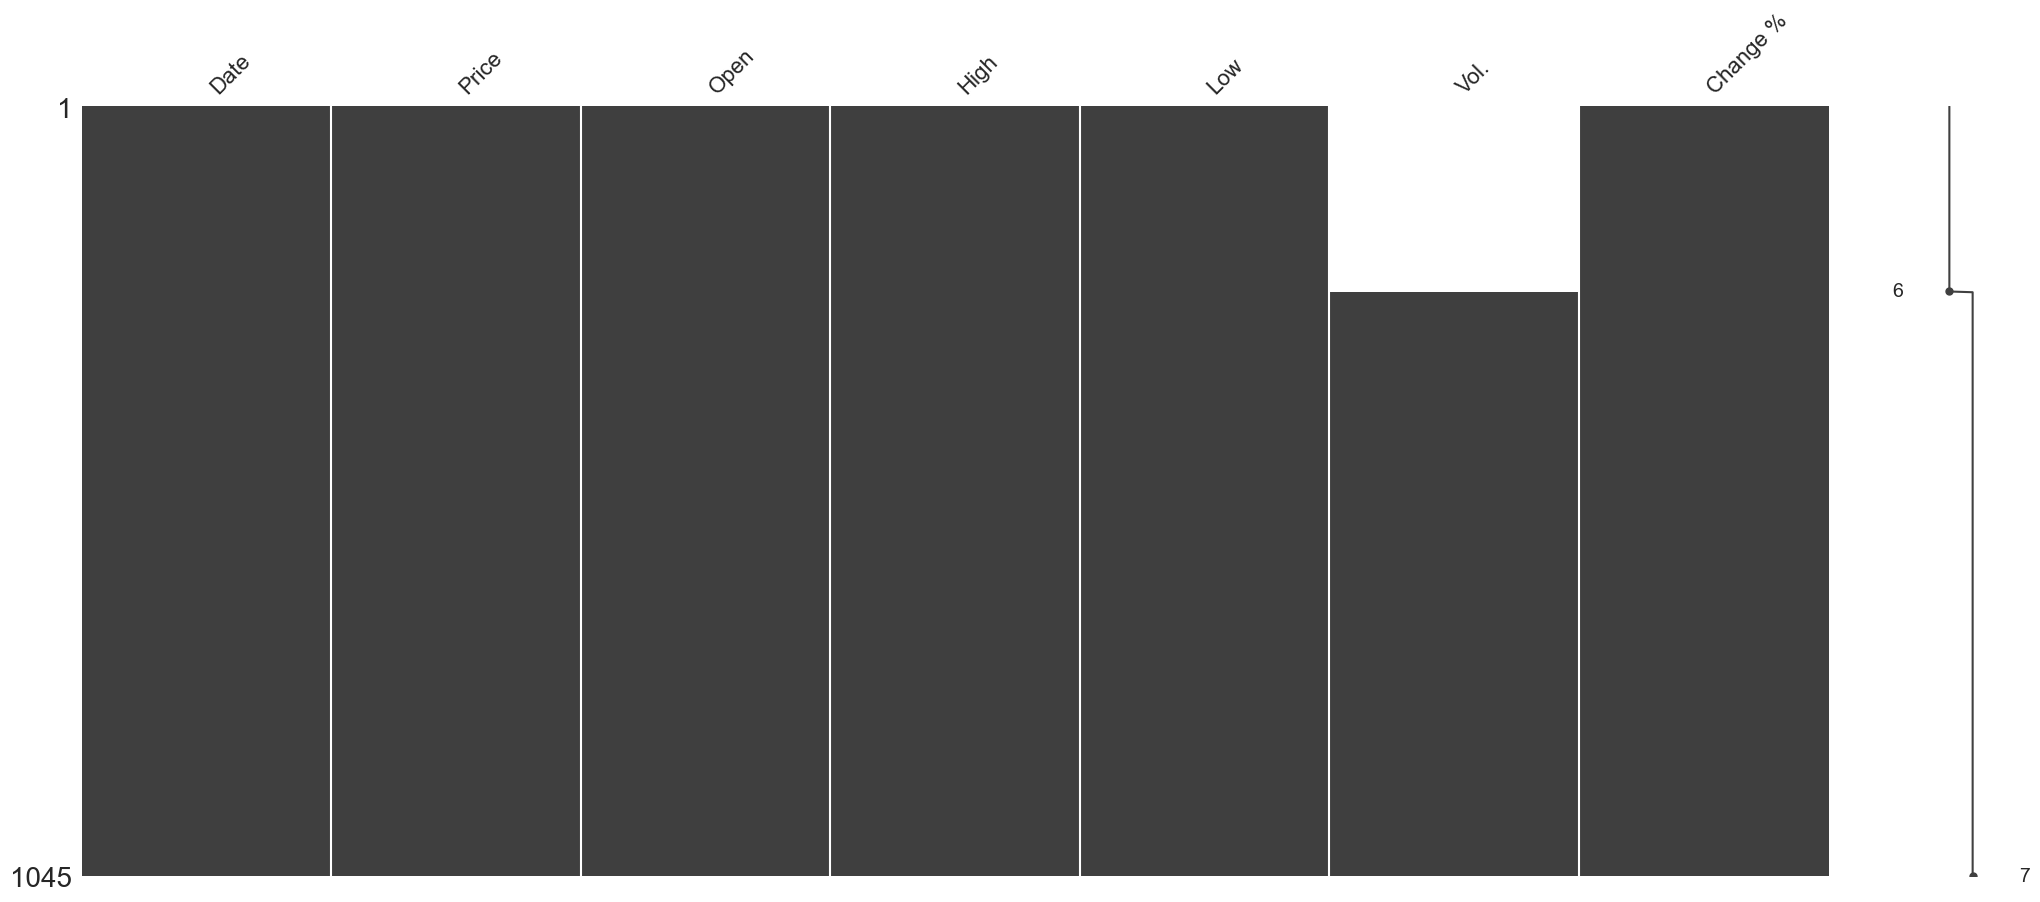

In [9]:
import missingno as msno
msno.matrix(df)#a matrix of the distribution of missing value in my dataset

In [10]:
#converting the coulumn to numeric
df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1045 non-null   object 
 1   Price     1045 non-null   float64
 2   Open      1045 non-null   float64
 3   High      1045 non-null   float64
 4   Low       1045 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  1045 non-null   float64
dtypes: float64(6), object(1)
memory usage: 57.3+ KB


In [12]:
#dropping the column Vol. as it doesn't represent a valuable data
df.drop('Vol.', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1045 non-null   object 
 1   Price     1045 non-null   float64
 2   Open      1045 non-null   float64
 3   High      1045 non-null   float64
 4   Low       1045 non-null   float64
 5   Change %  1045 non-null   float64
dtypes: float64(5), object(1)
memory usage: 49.1+ KB


In [14]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format
df = df.sort_values('Date')  # Ensure data is sorted by date
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 1044 to 0
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1045 non-null   datetime64[ns]
 1   Price     1045 non-null   float64       
 2   Open      1045 non-null   float64       
 3   High      1045 non-null   float64       
 4   Low       1045 non-null   float64       
 5   Change %  1045 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 57.1 KB


In [15]:
df['7-Day MA'] = df['Price'].rolling(window=7).mean()  # 7-day moving average
df['30-Day MA'] = df['Price'].rolling(window=30).mean()  # 30-day moving average
# Display the updated dataframe
print(df[['Date', 'Price', '7-Day MA', '30-Day MA']].head(40))

           Date   Price  7-Day MA  30-Day MA
1044 2020-01-13  3.1320       NaN        NaN
1043 2020-01-14  3.1238       NaN        NaN
1042 2020-01-15  3.1393       NaN        NaN
1041 2020-01-16  3.1185       NaN        NaN
1040 2020-01-17  3.1279       NaN        NaN
1039 2020-01-20  3.1159       NaN        NaN
1038 2020-01-21  3.1205  3.125414        NaN
1037 2020-01-22  3.1285  3.124914        NaN
1036 2020-01-23  3.1170  3.123943        NaN
1035 2020-01-24  3.1147  3.120429        NaN
1034 2020-01-27  3.1123  3.119543        NaN
1033 2020-01-28  3.1053  3.116314        NaN
1032 2020-01-29  3.1208  3.117014        NaN
1031 2020-01-30  3.1169  3.116500        NaN
1030 2020-01-31  3.1151  3.114586        NaN
1029 2020-02-03  3.1117  3.113829        NaN
1028 2020-02-04  3.1194  3.114500        NaN
1027 2020-02-05  3.1183  3.115357        NaN
1026 2020-02-06  3.1042  3.115200        NaN
1025 2020-02-07  3.1063  3.113129        NaN
1024 2020-02-10  3.0913  3.109471        NaN
1023 2020-

## EDA

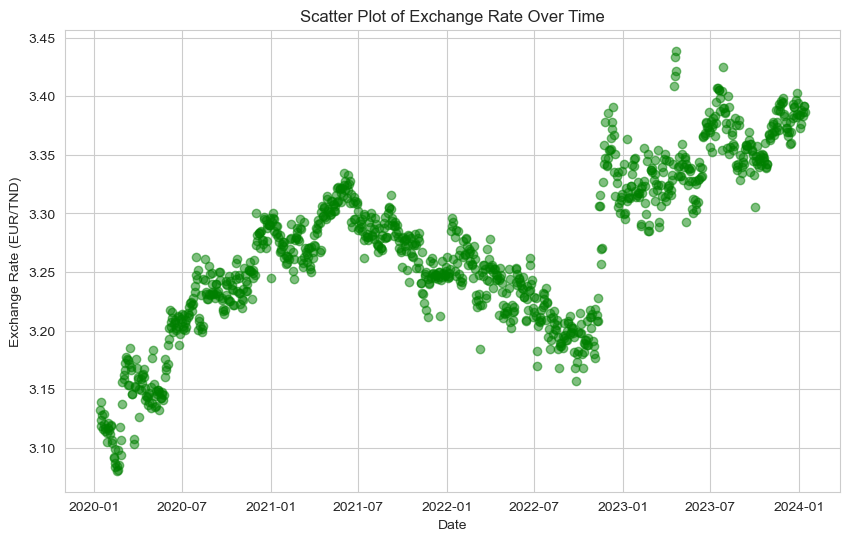

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of Date vs Rate
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Price'], color='Green', alpha=0.5)
plt.title('Scatter Plot of Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (EUR/TND)')
plt.grid(True)
plt.show()


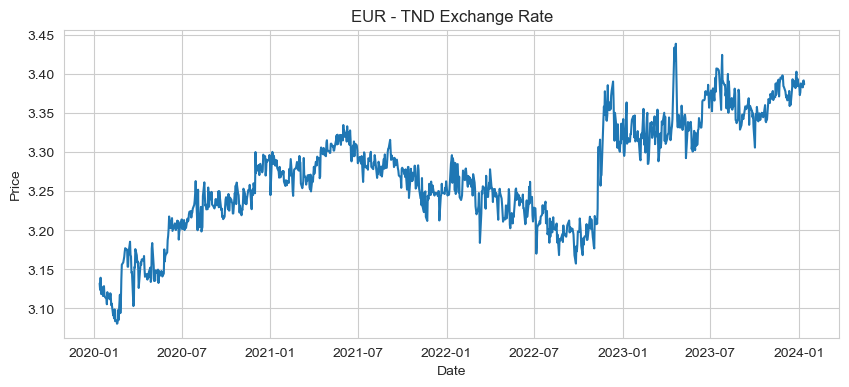

In [17]:
#Exchange Rate chart
plt.figure(figsize=(10, 4))
plt.title("EUR - TND Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["Date"], df["Price"])
plt.show()

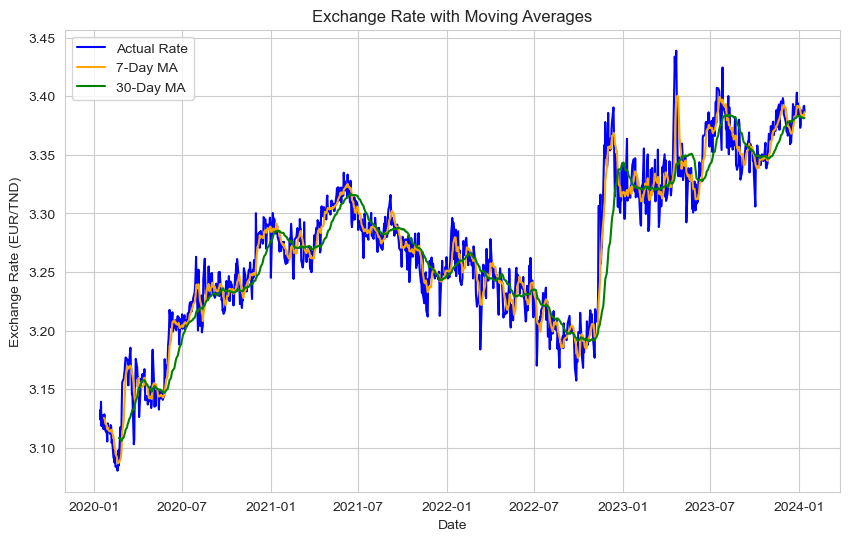

In [18]:
#Exchange Rate with moving averges
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Actual Rate', color='blue')
plt.plot(df['Date'], df['7-Day MA'], label='7-Day MA', color='orange')
plt.plot(df['Date'], df['30-Day MA'], label='30-Day MA', color='green')
plt.title('Exchange Rate with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (EUR/TND)')
plt.legend()
plt.grid(True)
plt.show()


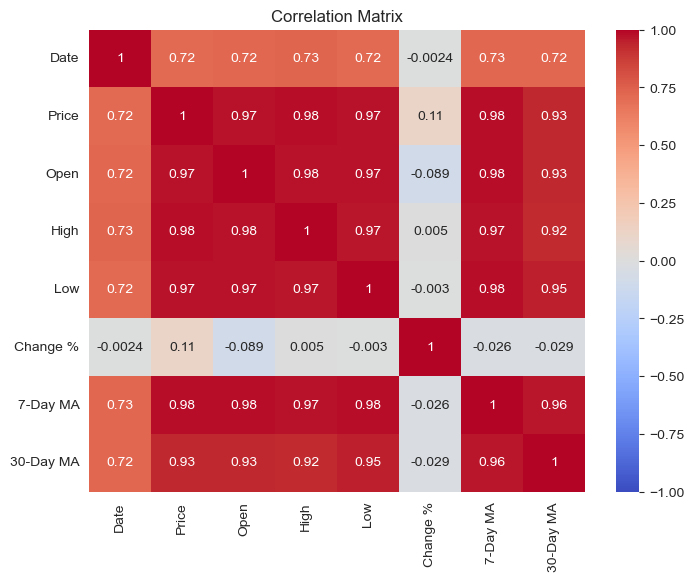

In [19]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**Checking if the data is stationary:**

In [20]:
#Selecting only the numeric column
exchange_rate_series = df['Price']  

# Performing the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(exchange_rate_series)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.9918776960006823
p-value: 0.29014576303210127


our p-value > 0.05 so we reject the null hypothesis(the series are non-sationary)=>The ADF test results showed non-stationarity.
ARIMA was eliminated as it requires stationary data.

**Split the Data into Training and Test Sets**

In [64]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]


**Identify Seasonality and Trends: Decomposition of time-series into trend and seasonality components**

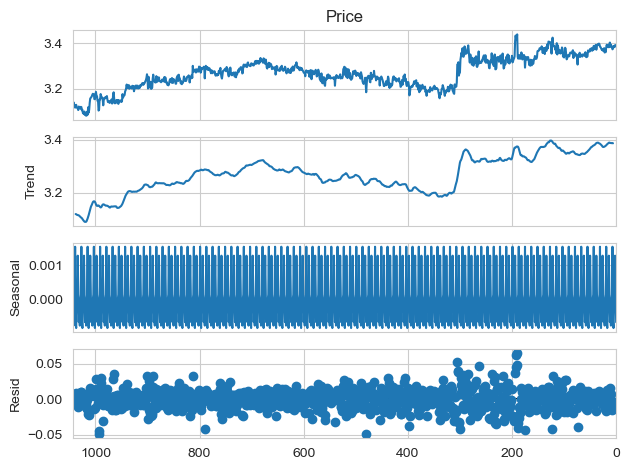

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(exchange_rate_series, model='additive', period=12)


result.plot()
plt.show()



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

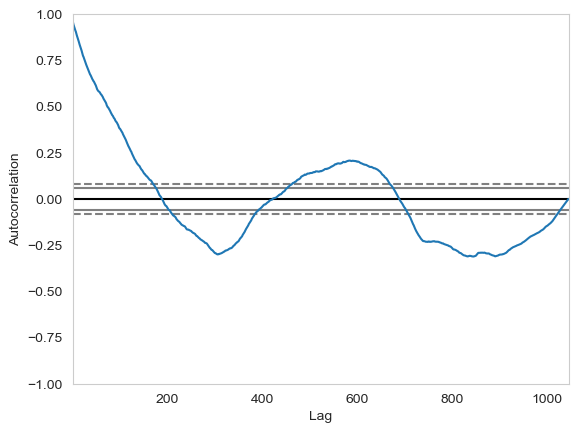

In [61]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Price'])

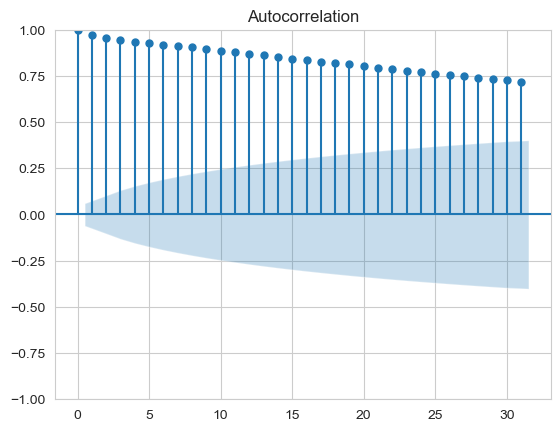

In [62]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Price'])
plt.show()

### Selecting and building Model</br>
Let's start with **Prophet**

In [69]:
print(df.columns)


Index(['Price', 'Open', 'High', 'Low', 'Change %', '7-Day MA', '30-Day MA'], dtype='object')


In [70]:
df.head()

,Price,Open,High,Low,Change %,7-Day MA,30-Day MA
Date,,,,,,,
2020-01-13,3.1320,3.1309,3.1575,3.0976,0.22,NaN,NaN
2020-01-14,3.1238,3.1334,3.1465,3.1195,-0.26,NaN,NaN
2020-01-15,3.1393,3.1252,3.1537,3.1172,0.50,NaN,NaN
2020-01-16,3.1185,3.1404,3.1528,3.1160,-0.66,NaN,NaN
2020-01-17,3.1279,3.1337,3.1482,3.1089,0.30,NaN,NaN


In [23]:
#installing prophet
!pip install prophet


In [65]:
#preparing the data for prophet
df_prophet = train[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})


KeyError: "['Date'] not in index"

In [68]:
print(df.columns)


Index(['Price', 'Open', 'High', 'Low', 'Change %', '7-Day MA', '30-Day MA'], dtype='object')


In [ ]:
print(df_prophet.columns)


In [ ]:
#fitting the prophet model
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


In [27]:
# Preparing the test data for Prophet
df_test_prophet = test[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})

# Ensure the date column is in datetime format
df_test_prophet['ds'] = pd.to_datetime(df_test_prophet['ds'])


In [28]:
#Making future predictions using our test data
future = model.make_future_dataframe(periods=len(df_test_prophet))   
forecast = model.predict(future)


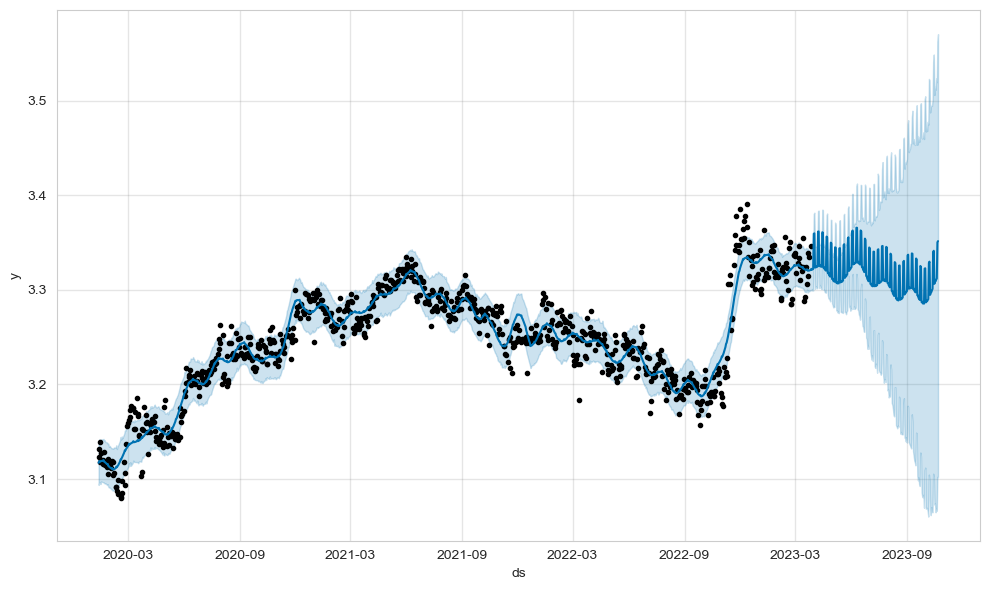

In [29]:
#plotting the forecast
model.plot(forecast)
plt.show()


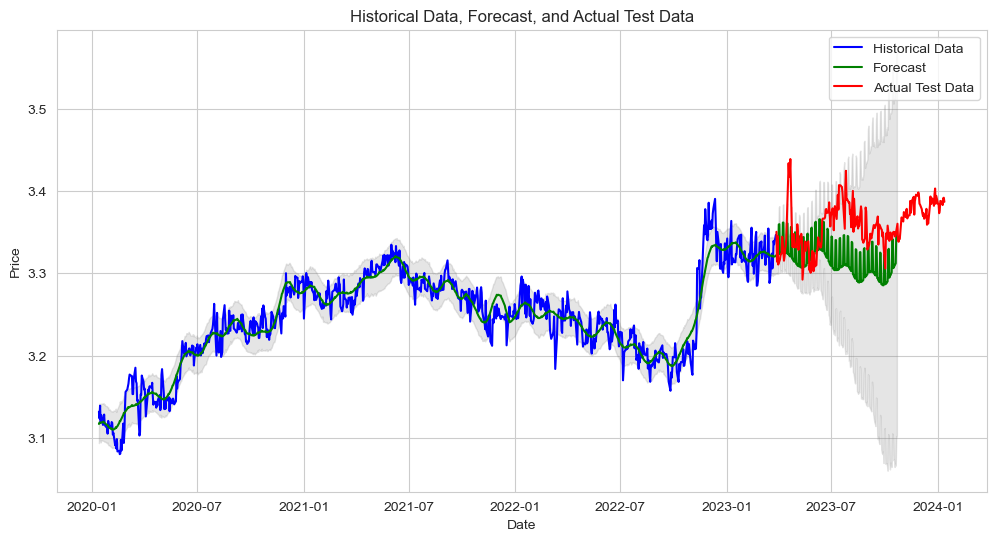

In [30]:
# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_prophet['ds'], df_prophet['y'], label='Historical Data', color='blue')

# Plot forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)

# Plot actual test data
plt.plot(df_test_prophet['ds'], df_test_prophet['y'], label='Actual Test Data', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Data, Forecast, and Actual Test Data')
plt.legend()
plt.show()

**Evaluating Model Performance**

In [31]:
# Check if all test dates are in forecast
missing_dates = df_test_prophet[~df_test_prophet['ds'].isin(forecast['ds'])]
if not missing_dates.empty:
    print("These test dates are missing in the forecast:")
    print(missing_dates)


These test dates are missing in the forecast:
           ds       y
59 2023-10-23  3.3603
58 2023-10-24  3.3400
57 2023-10-25  3.3384
56 2023-10-26  3.3422
55 2023-10-27  3.3419
54 2023-10-30  3.3680
53 2023-10-31  3.3668
52 2023-11-01  3.3645
51 2023-11-02  3.3630
50 2023-11-03  3.3745
49 2023-11-06  3.3684
48 2023-11-07  3.3764
47 2023-11-08  3.3784
46 2023-11-09  3.3668
45 2023-11-10  3.3701
44 2023-11-13  3.3705
43 2023-11-14  3.3880
42 2023-11-15  3.3736
41 2023-11-16  3.3781
40 2023-11-17  3.3883
39 2023-11-20  3.3930
38 2023-11-21  3.3714
37 2023-11-22  3.3876
36 2023-11-23  3.3917
35 2023-11-24  3.3956
34 2023-11-27  3.3942
33 2023-11-28  3.3984
32 2023-11-29  3.3955
31 2023-11-30  3.3846
30 2023-12-01  3.3835
29 2023-12-04  3.3780
28 2023-12-05  3.3731
27 2023-12-06  3.3697
26 2023-12-07  3.3730
25 2023-12-08  3.3664
24 2023-12-11  3.3694
23 2023-12-12  3.3784
22 2023-12-13  3.3591
21 2023-12-14  3.3698
20 2023-12-15  3.3605
19 2023-12-18  3.3819
18 2023-12-19  3.3934
17 2023-

In [32]:
# Filter the forecast DataFrame to only include dates that are in the test DataFrame
forecast_test = forecast[forecast['ds'].isin(df_test_prophet['ds'])]


In [33]:
# Merge forecast and test data on date to ensure alignment
merged_df = pd.merge(df_test_prophet, forecast_test, on='ds')

# Extract values
y_true = merged_df['y'].values
y_pred = merged_df['yhat'].values

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 0.048042780789367516
RMSE: 0.056171740066465164


**SARIMA + XGBOOST**

In [34]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install statsmodels


In [67]:
print(df.columns)


Index(['Price', 'Open', 'High', 'Low', 'Change %', '7-Day MA', '30-Day MA'], dtype='object')


In [42]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/614.7 kB 326.8 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 469.7 kB/s eta 0:00:02
   ---------- --------------------------- 174.1/614.7 kB 952.6 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/614.7 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 1.3 MB/s eta 0:00:01
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [43]:
import pmdarima as pmd

In [50]:
model=pmd.auto_arima(train['Price'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-4671.170, Time=3.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4563.043, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-4625.193, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4654.440, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-4564.819, Time=0.13 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-4673.154, Time=2.73 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-4674.659, Time=0.91 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-4673.140, Time=1.39 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-4651.937, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-4626.291, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-4672.708, Time=1.72 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-4672.586, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-4670.631, Time=0.96 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-4640.922, Time=0.38 sec
 ARIM

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Preparing data for SARIMA model
exchange_rate_series = df['Price']
exchange_rate_series

Date
2020-01-13    3.1320
2020-01-14    3.1238
2020-01-15    3.1393
2020-01-16    3.1185
2020-01-17    3.1279
               ...  
2024-01-08    3.3870
2024-01-09    3.3830
2024-01-10    3.3914
2024-01-11    3.3919
2024-01-12    3.3869
Name: Price, Length: 1045, dtype: float64

In [72]:
# Specifying SARIMA Parameters
p, d, q = 1, 1, 1 # ARIMA parameters (order)
P, D, Q, m = 1, 1, 1, 12 # Seasonal parameters (seasonal order)

# Fit the SARIMA model
model = SARIMAX(exchange_rate_series, order=(p,d,q), seasonal_order=(P,D,Q,m))
sarima_model = model.fit()

# summary to check model fit
print(sarima_model.summary())




C:\Users\nourh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\nourh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\nourh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 1045
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                2836.480
Date:                            Sun, 13 Oct 2024   AIC                          -5662.960
Time:                                    12:27:29   BIC                          -5638.264
Sample:                                01-13-2020   HQIC                         -5653.588
                                     - 01-12-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4187      0.044      9.459      0.000       0.332       0.505
ma.L1         -0.7571      0.030   

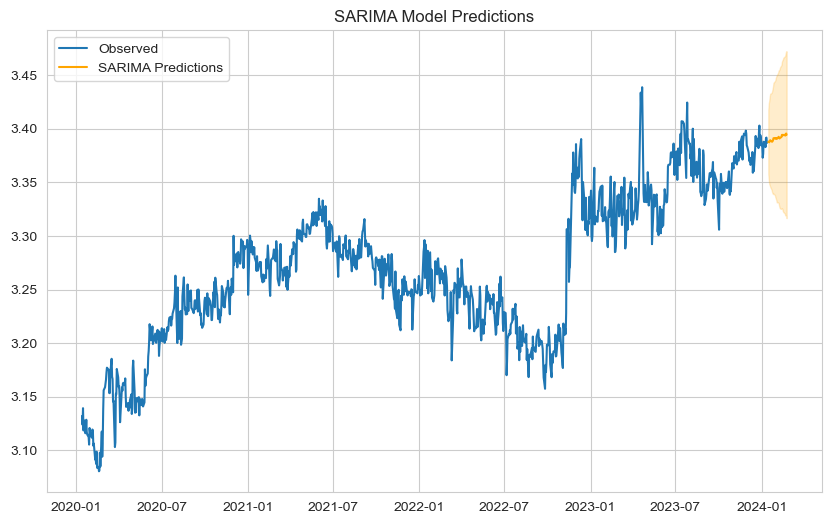

In [73]:
# Number of steps to predict
n_steps = 30

# Generate predictions
pred = sarima_model.get_forecast(steps=n_steps)
predicted_values = pred.predicted_mean

# Confidence intervals
conf_int = pred.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(exchange_rate_series, label='Observed')
plt.plot(predicted_values, label='SARIMA Predictions', color='orange')
plt.fill_between(predicted_values.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], color='orange', alpha=0.2)
plt.legend(loc='upper left')
plt.title('SARIMA Model Predictions')
plt.show()

In [74]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(exchange_rate_series[-n_steps:], predicted_values))
print(f"RMSE: {rmse}")


RMSE: 0.013818729127284124


In [ ]:
pip install scikit-learn


In [75]:
from sklearn.metrics import mean_absolute_error

# Assuming actual_values and sarima_predictions are already defined
mae = mean_absolute_error(exchange_rate_series[-n_steps:], predicted_values)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.011363990083411624


**Hybrid approach**

In [76]:
# Get residuals (the part SARIMA couldn't predict well)
residuals = exchange_rate_series - sarima_model.fittedvalues

# Drop NaN values
residuals = residuals.dropna()


In [77]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create lag features for residuals (e.g., use the last 5 residuals to predict the next one)
lagged_residuals = pd.concat([residuals.shift(i) for i in range(1, 6)], axis=1)
lagged_residuals.columns = [f'lag_{i}' for i in range(1, 6)]
lagged_residuals.dropna(inplace=True)

# Define target and features
X = lagged_residuals
y = residuals[lagged_residuals.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [78]:
# Define the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict the residuals
xgboost_pred = xgboost_model.predict(X_test)

# Calculate RMSE for XGBoost predictions
xgboost_rmse = np.sqrt(mean_squared_error(y_test, xgboost_pred))
print(f"XGBoost RMSE: {xgboost_rmse}")


XGBoost RMSE: 0.020124127965295963


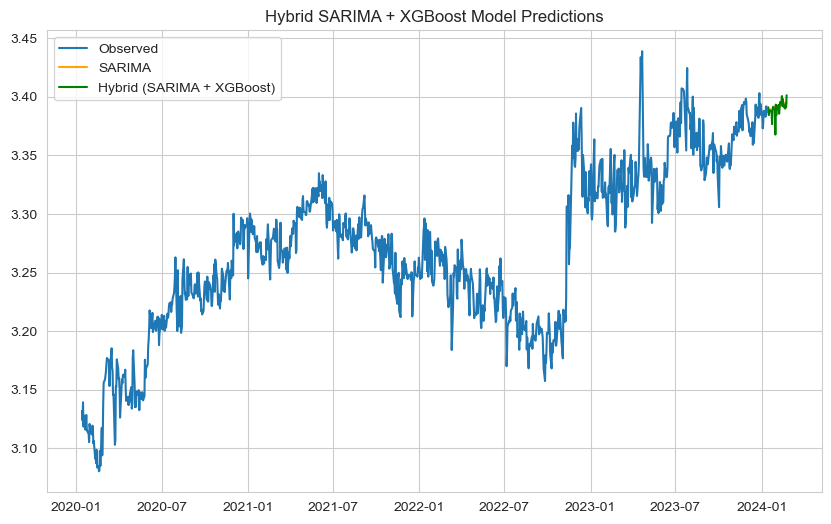

In [79]:
# Make predictions using SARIMA for the next n_steps
sarima_forecast = sarima_model.get_forecast(steps=n_steps).predicted_mean

# First, create the lagged features for forecasting
lagged_features_for_forecast = pd.concat([residuals.shift(i).iloc[-n_steps:] for i in range(1, 6)], axis=1)

# Now rename the columns to match the ones used during XGBoost training
lagged_features_for_forecast.columns = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

# Make the XGBoost predictions
xgboost_forecast = xgboost_model.predict(lagged_features_for_forecast)

# Combine SARIMA and XGBoost predictions
hybrid_forecast = sarima_forecast + xgboost_forecast


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(exchange_rate_series, label='Observed')
plt.plot(sarima_forecast, label='SARIMA', color='orange')
plt.plot(hybrid_forecast, label='Hybrid (SARIMA + XGBoost)', color='green')
plt.legend(loc='upper left')
plt.title('Hybrid SARIMA + XGBoost Model Predictions')
plt.show()


In [80]:
from sklearn.metrics import mean_absolute_error
actual_values = exchange_rate_series[-n_steps:]

# Ensure lengths match
actual_values_for_comparison = actual_values[:len(hybrid_forecast)]
mae = mean_absolute_error(actual_values_for_comparison, hybrid_forecast)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.012190024155055375


In [81]:
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.014871357688577773


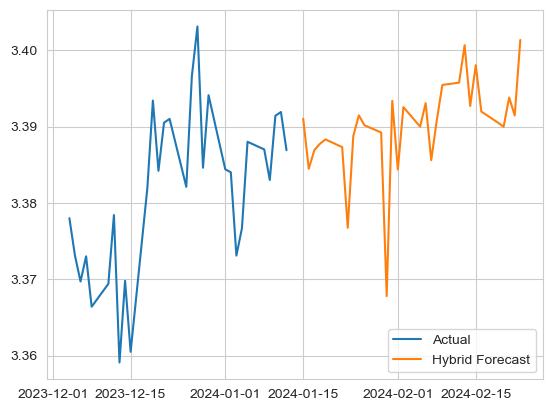

In [82]:
import matplotlib.pyplot as plt
plt.plot(actual_values, label='Actual')
plt.plot(hybrid_forecast, label='Hybrid Forecast')
plt.legend()
plt.show()
